In [905]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

from statsmodels.tsa.seasonal import seasonal_decompose

from pmdarima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [906]:
df=pd.read_csv("HDFC.csv",index_col='Date',parse_dates=True)

In [907]:
df

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,HDFC,EQ,271.75,293.50,293.50,293.50,293.50,293.50,293.50,22744,6.675364e+11,NaN,NaN,NaN
2000-01-04,HDFC,EQ,293.50,317.00,317.00,297.00,304.00,304.05,303.62,255251,7.749972e+12,NaN,NaN,NaN
2000-01-05,HDFC,EQ,304.05,290.00,303.90,285.00,295.00,292.80,294.53,269087,7.925368e+12,NaN,NaN,NaN
2000-01-06,HDFC,EQ,292.80,301.00,314.00,295.00,296.00,296.45,300.14,305916,9.181669e+12,NaN,NaN,NaN
2000-01-07,HDFC,EQ,296.45,290.00,296.35,281.00,287.10,286.55,288.80,197039,5.690480e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,HDFC,EQ,2497.35,2500.00,2534.10,2483.20,2502.00,2509.80,2508.07,3916088,9.821805e+14,121028.0,2440395.0,0.6232
2021-04-27,HDFC,EQ,2509.80,2494.15,2526.80,2486.25,2514.00,2518.40,2509.18,2040799,5.120730e+14,102250.0,1040749.0,0.5100
2021-04-28,HDFC,EQ,2518.40,2516.10,2609.00,2508.30,2575.00,2577.00,2574.21,3407461,8.771527e+14,117425.0,1815110.0,0.5327


# Data Preprocessing

In [908]:
df['Date']=df.index

In [909]:
start_date='2016-01-01'
end_date='2020-12-31'
mask=(df['Date']>=start_date)&(df['Date']<=end_date)

In [910]:
df=df.loc[mask]

In [911]:
df=df.ffill()

In [912]:
df['Prev Close'].isnull().values.any()

False

In [913]:
df=df.drop(columns=['Date','Symbol','Series'])

In [914]:
df.dropna(inplace=True)

<AxesSubplot:>

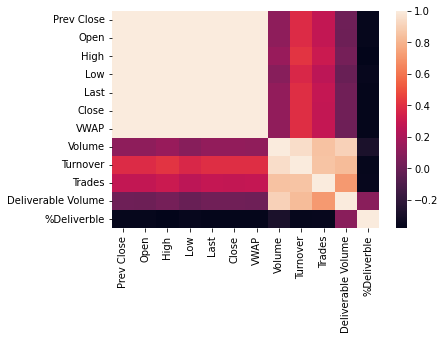

In [915]:
sn.heatmap(df.corr())

In [916]:
df=df.asfreq('B')
df.index

DatetimeIndex(['2016-01-01', '2016-01-04', '2016-01-05', '2016-01-06',
               '2016-01-07', '2016-01-08', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14',
               ...
               '2020-12-18', '2020-12-21', '2020-12-22', '2020-12-23',
               '2020-12-24', '2020-12-25', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=1305, freq='B')

In [917]:
df=df.ffill(axis=0)
df['Prev Close'].isnull().values.any()

False

In [918]:
Ntest=math.trunc(0.3*len(df))
train=df.iloc[:-Ntest,3]
test=df.iloc[-Ntest:,3]

In [919]:
Decomp_results=seasonal_decompose(df['Prev Close'])

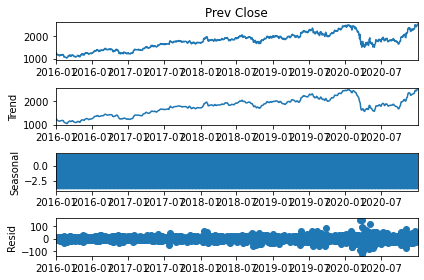

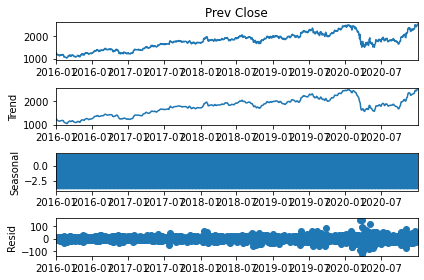

In [920]:
Decomp_results.plot()

In [921]:
exo=df.iloc[:,:11]
exo_train=exo.iloc[:-Ntest]
exo_test=exo.iloc[-Ntest:]


In [922]:
exo=exo.asfreq('B')
exo.ffill()
exo=np.nan_to_num(exo)

In [923]:
auto_arima(df['Prev Close'],exogenous=exo,m=1,trace=True,D=1).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-6840.527, Time=1.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-6453.771, Time=1.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-6626.315, Time=1.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-6772.859, Time=1.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1595.081, Time=0.86 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-6834.327, Time=1.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-6797.331, Time=1.22 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-6841.659, Time=1.31 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-6785.600, Time=1.30 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-6860.658, Time=1.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-6851.789, Time=1.36 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-6866.514, Time=1.54 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=-6874.081, Time=1.68 sec
 ARIMA(5,1,2)(0,0,0)[0] in

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1305
Model:               SARIMAX(5, 1, 3)   Log Likelihood                3458.779
Date:                Sun, 25 Sep 2022   AIC                          -6877.557
Time:                        11:22:45   BIC                          -6774.093
Sample:                             0   HQIC                         -6838.743
                               - 1305                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0000   4.66e-33   2.14e+32      0.000       1.000       1.000
x2         -3.886e-16   3.58e-33  -1.09e+17      0.000   -3.89e-16   -3.89e-16
x3         -6.939e-17   1.11e-32  -6.27e+15      0.000   -6.94e-17   -6.94e-17
x4         -2.914e-16   3.05e-33  -9.56e+16      0.000   -2.91e-16   -2.91e-16
x5          2.151e-16   1.14e-32   1.88e+16      0.000    2.15e-16    2.15e-16
x6           2.22e-16   1.19e-32   1.87e+16      0.000    2.22e-16    2.22e-16
x7          1.943e-16   7.46e-33    2.6e+16      0.000    1.94e-16    1.94e-16
x8         -7.023e-18   2.02e-27  -3.48e+09      0.000   -7.02e-18   -7.02e-18
x9         -6.316e-17   4.03e-19   -156.540      0.000    -6.4e-17   -6.24e-17
x10        -4.167e-17   3.37e-29  -1.24e+12      0.000   -4.17e-17   -4.17e-17
x11         2.715e-17   1.16e-27   2.34e+10      0.000    2.72e-17    2.72e-17
ar.L1         -0.4628   4.49e-37  -1.03e+36      0.000      -0.463      -0.463
ar.L2         -0.1523   1.14e-36  -1.34e+35      0.000      -0.152      -0.152
ar.L3          0.3840   1.54e-36    2.5e+35      0.000       0.384       0.384
ar.L4          0.1334   1.72e-37   7.75e+35      0.000       0.133       0.133
ar.L5          0.0954   2.12e-37   4.49e+35      0.000       0.095       0.095
ma.L1         -0.1068   1.18e-38  -9.05e+36      0.000      -0.107      -0.107
ma.L2         -0.2848   9.93e-37  -2.87e+35      0.000      -0.285      -0.285
ma.L3         -0.5061   8.81e-37  -5.75e+35      0.000      -0.506      -0.506
sigma2         0.0003   4.02e-32   7.49e+27      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   1.15   Jarque-Bera (JB):             16876.69
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               5.53   Skew:                             2.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.47e+54. Standard errors may be unstable.
"""

# ARIMAX

In [924]:
model_arimax=ARIMA(train,exog=exo_train,order=(5,1,3))

Model_arimax=model_arimax.fit()

Model_arimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Low   No. Observations:                  913
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -3569.961
Method:                       css-mle   S.D. of innovations             57.211
Date:                Sun, 25 Sep 2022   AIC                           7181.922
Time:                        11:23:33   BIC                           7283.074
Sample:                    01-04-2016   HQIC                          7220.536
                         - 07-03-2019                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0014      2.372     -0.001      1.000      -4.650       4.647
Prev Close            -0.9023      0.049    -18.552      0.000      -0.998      -0.807
Open                   0.0712      0.064      1.114      0.265      -0.054       0.196
High                  -0.1056      0.078     -1.359      0.174      -0.258       0.047
Low                    0.8185      0.117      6.973      0.000       0.588       1.049
Last                  -0.3563      0.115     -3.100      0.002      -0.582      -0.131
Close                  0.4118      0.143      2.885      0.004       0.132       0.692
VWAP                   0.0674      0.123      0.546      0.585      -0.174       0.309
Volume              5.301e-06        nan        nan        nan         nan         nan
Turnover            2.636e-15        nan        nan        nan         nan         nan
Trades              3.676e-05        nan        nan        nan         nan         nan
Deliverable Volume -6.343e-06        nan        nan        nan         nan         nan
ar.L1.D.Low           -0.0091      1.234     -0.007      0.994      -2.428       2.410
ar.L2.D.Low            0.0081      1.249      0.007      0.995      -2.439       2.455
ar.L3.D.Low           -0.0012      1.725     -0.001      0.999      -3.382       3.380
ar.L4.D.Low            0.0102      0.051      0.202      0.840      -0.089       0.110
ar.L5.D.Low            0.0419      0.031      1.340      0.180      -0.019       0.103
ma.L1.D.Low           -0.0091      1.239     -0.007      0.994      -2.438       2.420
ma.L2.D.Low            0.0081      1.268      0.006      0.995      -2.478       2.494
ma.L3.D.Low           -0.0012      1.767     -0.001      0.999      -3.465       3.463
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8383           -0.0000j            1.8383           -0.0000
AR.2            0.5390           -1.7988j            1.8778           -0.2037
AR.3            0.5390           +1.7988j            1.8778            0.2037
AR.4           -1.5805           -1.0876j            1.9185           -0.4041
AR.5           -1.5805           +1.0876j            1.9185            0.4041
MA.1           -2.6066           -7.8450j            8.2667           -0.3011
MA.2           -2.6066           +7.8450j            8.2667            0.3011
MA.3           11.7146           -0.0000j           11.7146           -0.0000
-----------------------------------------------------------------------------
"""

# SARIMAX

In [925]:
model_sarimax=SARIMAX(train,exog=exo_train,order=(5,1,3),seasonal_order=(0,0,0,0) )

Model_sarimax=model_sarimax.fit()

Model_sarimax.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Low   No. Observations:                  914
Model:               SARIMAX(5, 1, 3)   Log Likelihood                3399.297
Date:                Sun, 25 Sep 2022   AIC                          -6758.595
Time:                        11:23:36   BIC                          -6662.260
Sample:                    01-01-2016   HQIC                         -6721.820
                         - 07-03-2019                                         
Covariance Type:                  opg                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Prev Close          1.216e-13   1.77e-33   6.86e+19      0.000    1.22e-13    1.22e-13
Open                1.967e-13    3.2e-33   6.14e+19      0.000    1.97e-13    1.97e-13
High                -3.06e-13    6.1e-33  -5.02e+19      0.000   -3.06e-13   -3.06e-13
Low                    1.0000   1.15e-33    8.7e+32      0.000       1.000       1.000
Last                1.472e-13   2.33e-33   6.32e+19      0.000    1.47e-13    1.47e-13
Close              -1.966e-13   1.81e-33  -1.09e+20      0.000   -1.97e-13   -1.97e-13
VWAP                3.715e-13   2.35e-33   1.58e+20      0.000    3.72e-13    3.72e-13
Volume              1.534e-16    1.2e-27   1.28e+11      0.000    1.53e-16    1.53e-16
Turnover            2.422e-17   2.22e-19    109.173      0.000    2.38e-17    2.47e-17
Trades             -6.654e-17   1.95e-29  -3.41e+12      0.000   -6.65e-17   -6.65e-17
Deliverable Volume -7.052e-17    8.7e-28  -8.11e+10      0.000   -7.05e-17   -7.05e-17
ar.L1                      -0   1.87e-36         -0      1.000   -3.67e-36    3.67e-36
ar.L2                      -0   8.77e-37         -0      1.000   -1.72e-36    1.72e-36
ar.L3                      -0   8.77e-37         -0      1.000   -1.72e-36    1.72e-36
ar.L4                      -0   8.05e-37         -0      1.000   -1.58e-36    1.58e-36
ar.L5                       0    1.8e-37          0      1.000   -3.53e-37    3.53e-37
ma.L1                       0   1.87e-36          0      1.000   -3.67e-36    3.67e-36
ma.L2                       0   8.77e-37          0      1.000   -1.72e-36    1.72e-36
ma.L3                      -0   8.77e-37         -0      1.000   -1.72e-36    1.72e-36
sigma2              2.366e-05   1.02e-31   2.33e+26      0.000    2.37e-05    2.37e-05
===================================================================================
Ljung-Box (L1) (Q):                 105.09   Jarque-Bera (JB):               602.72
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.88   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.42e+64. Standard errors may be unstable.
"""

# Prediction

In [926]:
start_len=len(train)
end_len=len(train)+len(test)-1

In [938]:
pred_arimax=Model_arimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

In [939]:
pred_sarimax=Model_sarimax.predict(start=start_len,end=end_len,exog=exo_test,typ='levels')

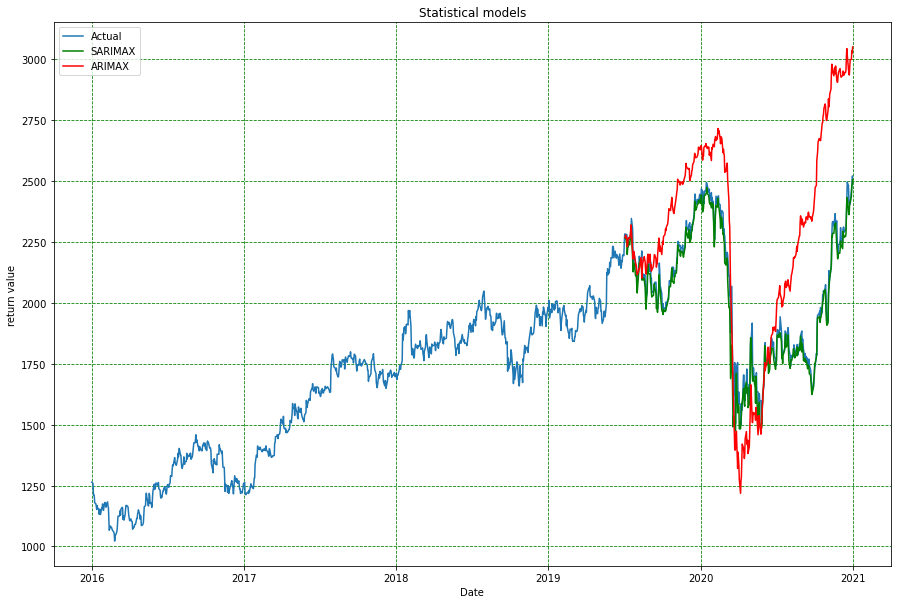

In [940]:
plt.figure(figsize=(15,10))
plt.plot(df['Prev Close'],label='Actual')
plt.plot(pred_sarimax,label='SARIMAX',color='green')
plt.plot(pred_arimax,label='ARIMAX',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

In [941]:
len(pred_arimax)
test=df['Prev Close'].iloc[-len(pred_arimax):]

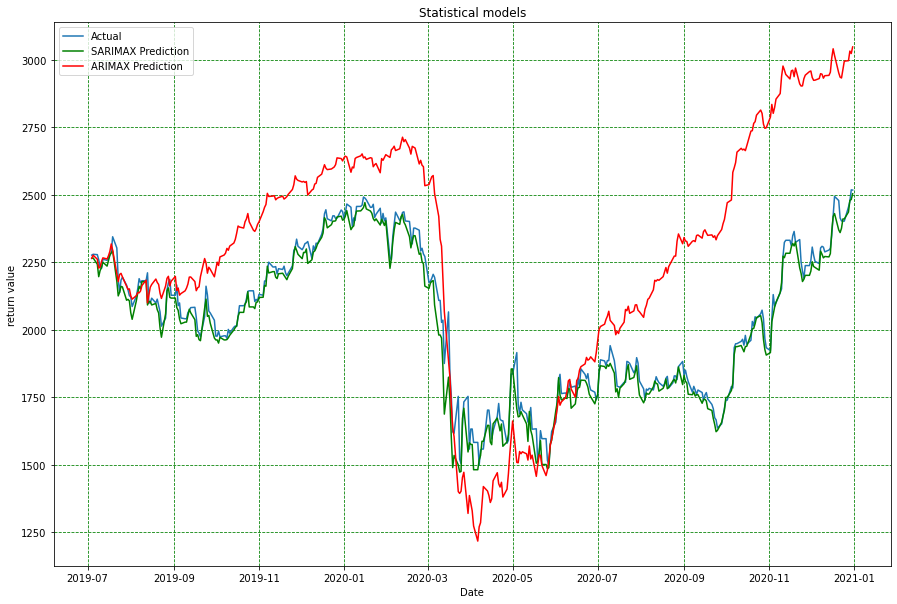

In [942]:
plt.figure(figsize=(15,10))
plt.plot(test,label='Actual')
plt.plot(pred_sarimax,label='SARIMAX Prediction',color='green')
plt.plot(pred_arimax,label='ARIMAX Prediction',color='red')
plt.title('Statistical models')
plt.xlabel('Date')
plt.ylabel('return value')
plt.grid(linestyle='dashed',color='green')
plt.legend()
plt.show()

# Evaluation

    ARIMAX

In [943]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_arimax))
print(rmse)

369.84250655707785


In [944]:
error=mean_absolute_error(test,pred_arimax)
print(error)

294.9006550111378


In [945]:
r2_score(test,pred_arimax)

-0.8700557459083027

    SARIMAX

In [946]:
test=np.nan_to_num(test)
rmse=math.sqrt(mean_squared_error(test,pred_sarimax))
print(rmse)

47.51646854028662


In [947]:
error=mean_absolute_error(test,pred_sarimax)
print(error)

32.097741444696666


In [948]:
r2_score(test,pred_sarimax)

0.9691319484056752